In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **LOADING THE DATAFRAME**

In [35]:
df = pd.read_csv ('data/horse.csv')
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [36]:
dfTrain,dfTest = train_test_split(df, test_size=0.3, random_state=0)

In [37]:
dfTrain.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.090000e+02,168.000000,193.000000,172.000000,38.000000,188.000000,188.000000,65.000000,209.00000,209.000000,209.0
mean,1.122420e+06,38.172024,72.777202,30.656977,5.126316,46.662234,21.422872,3.255385,3476.46890,14.885167,0.0
std,1.574079e+06,0.746162,29.019517,17.834647,1.800253,10.749158,25.778575,2.012696,5374.19771,215.192370,0.0
min,5.213990e+05,35.400000,30.000000,8.000000,1.500000,23.000000,3.300000,0.100000,0.00000,0.000000,0.0
25%,5.288040e+05,37.800000,48.000000,20.000000,4.125000,38.000000,6.500000,2.000000,1400.00000,0.000000,0.0
50%,5.300020e+05,38.200000,64.000000,28.000000,5.500000,45.000000,7.500000,2.800000,2208.00000,0.000000,0.0
75%,5.345560e+05,38.600000,90.000000,36.000000,6.500000,52.000000,10.400000,4.300000,3205.00000,0.000000,0.0
max,5.305629e+06,40.300000,184.000000,96.000000,7.500000,75.000000,89.000000,10.000000,41110.00000,3111.000000,0.0


# **FEATURE ENGINEERING**

In [38]:
dfTrain.drop(columns = ['cp_data', 'hospital_number'], axis = 1, inplace = True)
dfTest.drop(columns = ['cp_data', 'hospital_number'], axis = 1, inplace = True)

In [39]:
#The features lesion1, 2 and 3 will give us trouble because the way they are formated doesn't make any sense. 
#Therefore, we will create a new feature that counts the number of lesions the horse has to replace them.
dfTrain.loc[dfTrain['lesion_1'] > 0, 'lesion_1'] = 1
dfTrain.loc[dfTrain['lesion_2'] > 0, 'lesion_2'] = 1
dfTrain.loc[dfTrain['lesion_3'] > 0, 'lesion_3'] = 1

dfTrain['num_lesions'] = dfTrain['lesion_1'] + dfTrain['lesion_2'] + dfTrain['lesion_3']
dfTrain = dfTrain.drop(columns = ['lesion_1','lesion_2', 'lesion_3'], axis = 1)
dfTrain['num_lesions'].value_counts()

1    163
0     45
2      1
Name: num_lesions, dtype: int64

In [40]:
dfTest.loc[dfTest['lesion_1'] > 0, 'lesion_1'] = 1
dfTest.loc[dfTest['lesion_2'] > 0, 'lesion_2'] = 1
dfTest.loc[dfTest['lesion_3'] > 0, 'lesion_3'] = 1

dfTest['num_lesions'] = dfTest['lesion_1'] + dfTest['lesion_2'] + dfTest['lesion_3']
dfTest = dfTest.drop(columns = ['lesion_1','lesion_2', 'lesion_3'], axis = 1)

In [41]:
dfTrain

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,num_lesions
281,yes,adult,NaN,70.0,16.0,cool,absent,bright_red,more_3_sec,depressed,...,NaN,absent,distend_large,60.0,7.5,NaN,NaN,died,yes,1
44,yes,adult,35.4,140.0,24.0,cool,reduced,pale_cyanotic,more_3_sec,severe_pain,...,NaN,NaN,distend_large,57.0,69.0,serosanguious,2.0,euthanized,yes,1
241,yes,adult,NaN,36.0,32.0,normal,normal,pale_cyanotic,less_3_sec,extreme_pain,...,4.0,NaN,distend_small,41.0,5.9,NaN,NaN,died,yes,1
189,yes,adult,37.1,40.0,8.0,NaN,normal,pale_cyanotic,less_3_sec,mild_pain,...,NaN,decreased,firm,23.0,6.7,serosanguious,NaN,lived,yes,1
152,no,adult,38.6,48.0,20.0,cool,normal,normal_pink,less_3_sec,alert,...,NaN,decreased,other,50.0,7.3,clear,NaN,lived,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,yes,young,38.8,124.0,36.0,cool,normal,bright_pink,less_3_sec,depressed,...,NaN,absent,distend_small,50.0,7.6,serosanguious,NaN,died,yes,1
192,yes,adult,NaN,60.0,48.0,cool,reduced,pale_cyanotic,more_3_sec,severe_pain,...,NaN,NaN,NaN,58.0,7.6,NaN,NaN,died,yes,1
117,no,adult,39.5,NaN,NaN,cool,reduced,pale_cyanotic,more_3_sec,mild_pain,...,5.5,absent,distend_large,NaN,6.7,clear,NaN,euthanized,yes,1
47,no,adult,37.5,48.0,16.0,normal,normal,normal_pink,less_3_sec,alert,...,NaN,normal,NaN,37.0,6.5,NaN,NaN,lived,no,0


In [42]:
def OrdinalEncoder(df): #This manual ordinal encoder was done looking at the documentation to ensure they follow the correct scale (for ex: more pain -> bigger number)
    df['surgery'] = df['surgery'].map({'yes':1,'no':2}).astype('float64')
    df['age'] = df['age'].map({'adult':1,'young':2}).astype('float64')
    df['temp_of_extremities'] = df['temp_of_extremities'].map({'normal':1,'warm':2,'cool':3,'cold':4}).astype('float64')
    df['peripheral_pulse'] = df['peripheral_pulse'].map({'increased':2,'normal':1,'reduced':3,'absent':4}).astype('float64')
    df['mucous_membrane'] = df['mucous_membrane'].map({'dark_cyanotic':6,'bright_red':5,'pale_cyanotic':4,'pale_pink':3,'bright_pink':2,'normal_pink':1}).astype('float64')
    df['capillary_refill_time'] = df['capillary_refill_time'].map({'more_3_sec':3, '3':2, 'less_3_sec':1}).astype('float64')
    df['pain'] = df['pain'].map({'extreme_pain':5, 'severe_pain':4, 'mild_pain':3, 'depressed':2, 'alert':1}).astype('float64')
    df['peristalsis'] = df['peristalsis'].map({'absent':4, 'hypomotile':3, 'normal':2, 'hypermotile':1}).astype('float64')
    df['abdominal_distention'] = df['abdominal_distention'].map({'severe':4,'moderate':3,'slight':2,'none':1}).astype('float64')
    df['nasogastric_tube'] = df['nasogastric_tube'].map({'significant':3, 'slight':2, 'none':1}).astype('float64')
    df['nasogastric_reflux'] = df['nasogastric_reflux'].map({'more_1_liter':3, 'less_1_liter':2, 'none':0}).astype('float64')
    df['rectal_exam_feces'] = df['rectal_exam_feces'].map({'absent':4, 'decreased':3, 'increased':2, 'normal':1}).astype('float64')
    df['abdomen'] = df['abdomen'].map({'distend_large':5, 'distend_small':4, 'firm':3, 'other':2, 'normal':1}).astype('float64')
    df['abdomo_appearance'] = df['abdomo_appearance'].map({'serosanguious':3, 'cloudy':2, 'clear':1}).astype('float64')
    df['outcome'] = df['outcome'].map({'euthanized':3, 'died':2, 'lived':1}).astype('float64')
    df['surgical_lesion'] = df['surgical_lesion'].map({'yes':1,'no':0}).astype('float64')
    return df

In [43]:
dfTrain = OrdinalEncoder(dfTrain)
dfTest = OrdinalEncoder(dfTest)
dfTrain.dtypes

surgery                  float64
age                      float64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities      float64
peripheral_pulse         float64
mucous_membrane          float64
capillary_refill_time    float64
pain                     float64
peristalsis              float64
abdominal_distention     float64
nasogastric_tube         float64
nasogastric_reflux       float64
nasogastric_reflux_ph    float64
rectal_exam_feces        float64
abdomen                  float64
packed_cell_volume       float64
total_protein            float64
abdomo_appearance        float64
abdomo_protein           float64
outcome                  float64
surgical_lesion          float64
num_lesions                int64
dtype: object

In [44]:
dfTrain

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,num_lesions
281,1.0,1.0,NaN,70.0,16.0,3.0,4.0,5.0,3.0,2.0,...,NaN,4.0,5.0,60.0,7.5,NaN,NaN,2.0,1.0,1
44,1.0,1.0,35.4,140.0,24.0,3.0,3.0,4.0,3.0,4.0,...,NaN,NaN,5.0,57.0,69.0,3.0,2.0,3.0,1.0,1
241,1.0,1.0,NaN,36.0,32.0,1.0,1.0,4.0,1.0,5.0,...,4.0,NaN,4.0,41.0,5.9,NaN,NaN,2.0,1.0,1
189,1.0,1.0,37.1,40.0,8.0,NaN,1.0,4.0,1.0,3.0,...,NaN,3.0,3.0,23.0,6.7,3.0,NaN,1.0,1.0,1
152,2.0,1.0,38.6,48.0,20.0,3.0,1.0,1.0,1.0,1.0,...,NaN,3.0,2.0,50.0,7.3,1.0,NaN,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1.0,2.0,38.8,124.0,36.0,3.0,1.0,2.0,1.0,2.0,...,NaN,4.0,4.0,50.0,7.6,3.0,NaN,2.0,1.0,1
192,1.0,1.0,NaN,60.0,48.0,3.0,3.0,4.0,3.0,4.0,...,NaN,NaN,NaN,58.0,7.6,NaN,NaN,2.0,1.0,1
117,2.0,1.0,39.5,NaN,NaN,3.0,3.0,4.0,3.0,3.0,...,5.5,4.0,5.0,NaN,6.7,1.0,NaN,3.0,1.0,1
47,2.0,1.0,37.5,48.0,16.0,1.0,1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,37.0,6.5,NaN,NaN,1.0,0.0,0


In [45]:
y_test = dfTest['outcome']
dfTest.drop(columns = ['outcome'], axis = 1, inplace = True)

# **DATA VISUALIZATION**

Now lets take a glance at the correlation between features to decide how we will fill the missing values or nulls.

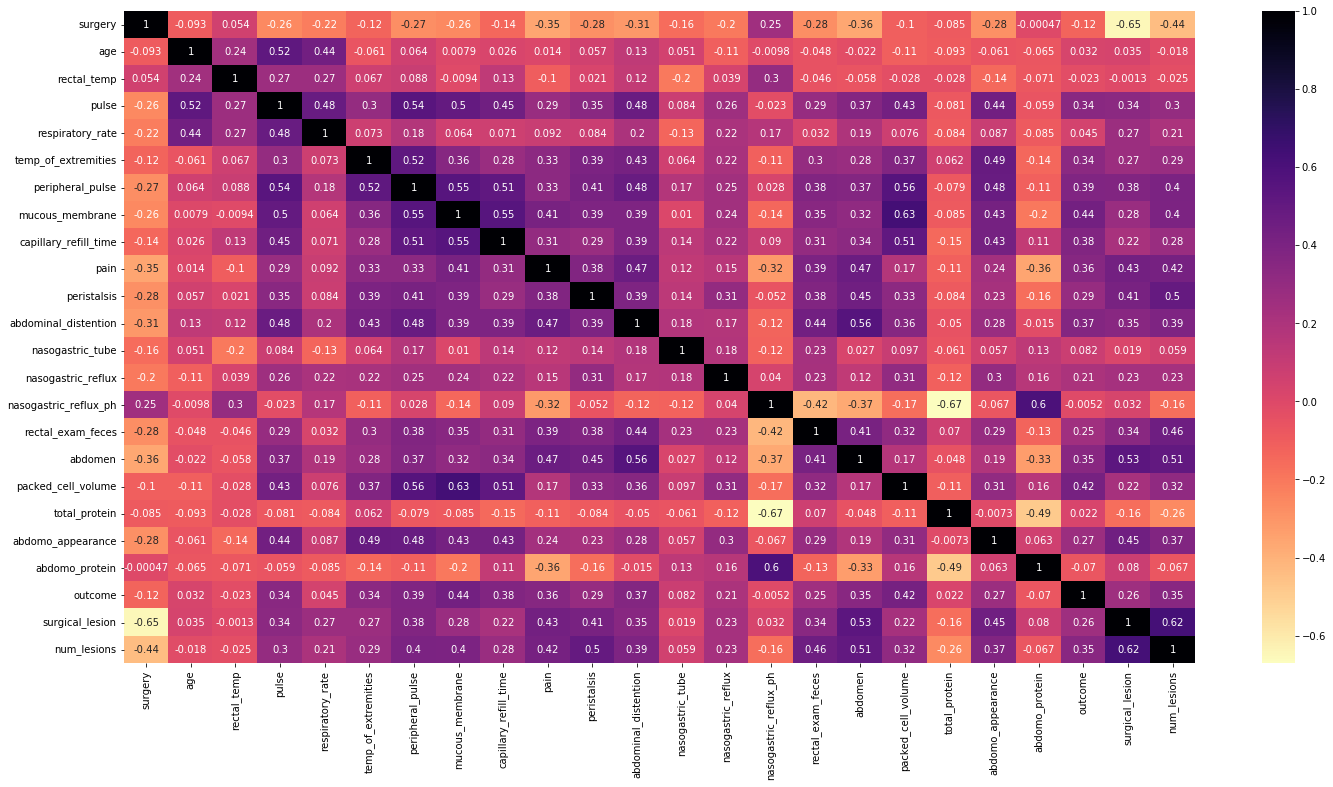

In [46]:
plt.figure(figsize=(24,12))
sns.heatmap(dfTrain.corr(),cmap='magma_r',annot=True)

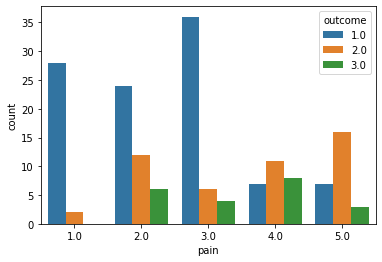

In [47]:
sns.countplot(data=dfTrain, x='pain', hue = 'outcome') #We can see how the bigger the pain, the less the chance of survival

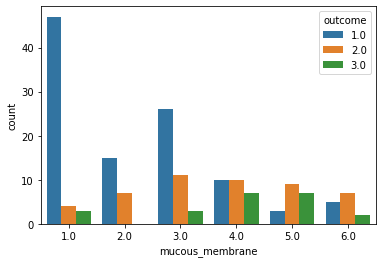

In [48]:
sns.countplot(data=dfTrain, x='mucous_membrane', hue = 'outcome') #We can see how the worse the circulation-> less the chance of survival

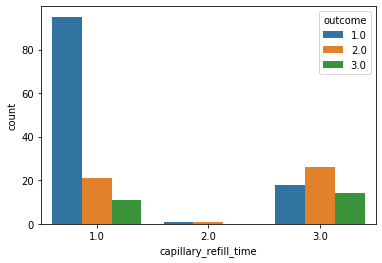

In [49]:
sns.countplot(data=dfTrain, x='capillary_refill_time', hue = 'outcome') #We can see how the worse the circulation-> less the chance of survival

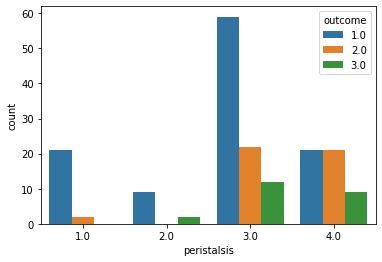

In [50]:
sns.countplot(data=dfTrain, x='peristalsis', hue = 'outcome') #the lesser the activity on the horses gut the lesser the chance of survival

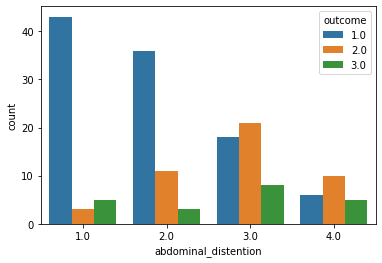

In [51]:
sns.countplot(data=dfTrain, x='abdominal_distention', hue = 'outcome') #the more distended the abdomen the lesser the chance of survival (it means more pain like the documentation says)

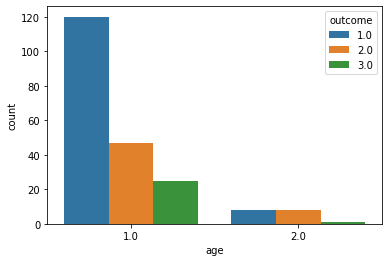

In [52]:
sns.countplot(data=dfTrain, x='age', hue = 'outcome') #surprisingly, the age of the horse doesn't have a big impact on the outcome of the surgery
#however younger horses tend to survive less

# **FILLING MISSING VALUES**

In [53]:
dfTrain.isna().sum() #There are no columns that have null values in the test dataframe but not in the train dataframe

surgery                    0
age                        0
rectal_temp               41
pulse                     16
respiratory_rate          37
temp_of_extremities       42
peripheral_pulse          50
mucous_membrane           33
capillary_refill_time     22
pain                      39
peristalsis               31
abdominal_distention      40
nasogastric_tube          73
nasogastric_reflux        77
nasogastric_reflux_ph    171
rectal_exam_feces         76
abdomen                   80
packed_cell_volume        21
total_protein             21
abdomo_appearance        117
abdomo_protein           144
outcome                    0
surgical_lesion            0
num_lesions                0
dtype: int64

In [54]:
#We start finding which columns to eliminate
for col in dfTrain.columns:
  if dfTrain[col].isna().sum() > 120: #More than 50% missing values
    print('Column ' + col + ' --> NULL VALUES: ' + str(dfTrain[col].isna().sum()) + ' --> Correlation with target of ' + str(dfTrain.corr()['outcome'][col]))

Column nasogastric_reflux_ph --> NULL VALUES: 171 --> Correlation with target of -0.005194866451076294
Column abdomo_protein --> NULL VALUES: 144 --> Correlation with target of -0.07010227029698288


In [55]:
#We drop columns nasogastric_reflux_ph and abdomo_protein as they don't hold a significant correlation with the target and they have > 50% of null values in the train dataset
#Filling their null values would cause more harm than good
dfTrain = dfTrain.drop(columns = ['abdomo_protein', 'nasogastric_reflux_ph'], axis = 1)
dfTest = dfTest.drop(columns = ['abdomo_protein', 'nasogastric_reflux_ph'], axis = 1)

In [56]:
KNNimpTR = KNNImputer(n_neighbors=1)
dfTrain = pd.DataFrame(KNNimpTR.fit_transform(dfTrain),columns = dfTrain.columns)
KNNimpTS = KNNImputer(n_neighbors=1)
dfTest = pd.DataFrame(KNNimpTS.fit_transform(dfTest),columns = dfTest.columns)

In [57]:
dfTrain.isna().sum() #No missing values remain!

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
outcome                  0
surgical_lesion          0
num_lesions              0
dtype: int64

# **NORMALIZATION OF THE VARIABLES**

In [58]:
#We also standardize the categorical variables despite it isn't necessary
target = dfTrain['outcome']
dfTrain = dfTrain.drop(columns = ['outcome'], axis = 1) #We extract the target to avoid standardizing it
features = dfTrain.columns
scaler = StandardScaler()
scaledTrain = scaler.fit_transform(dfTrain)
scaledTest = scaler.transform(dfTest) #we transform the test set with the model trained on the train set
dfTrain = pd.DataFrame(data=scaledTrain, columns=features)
dfTest = pd.DataFrame(data=scaledTest, columns=features) #We rebuild to a dataframe format"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C6D6644C0>,
      dtype=object)

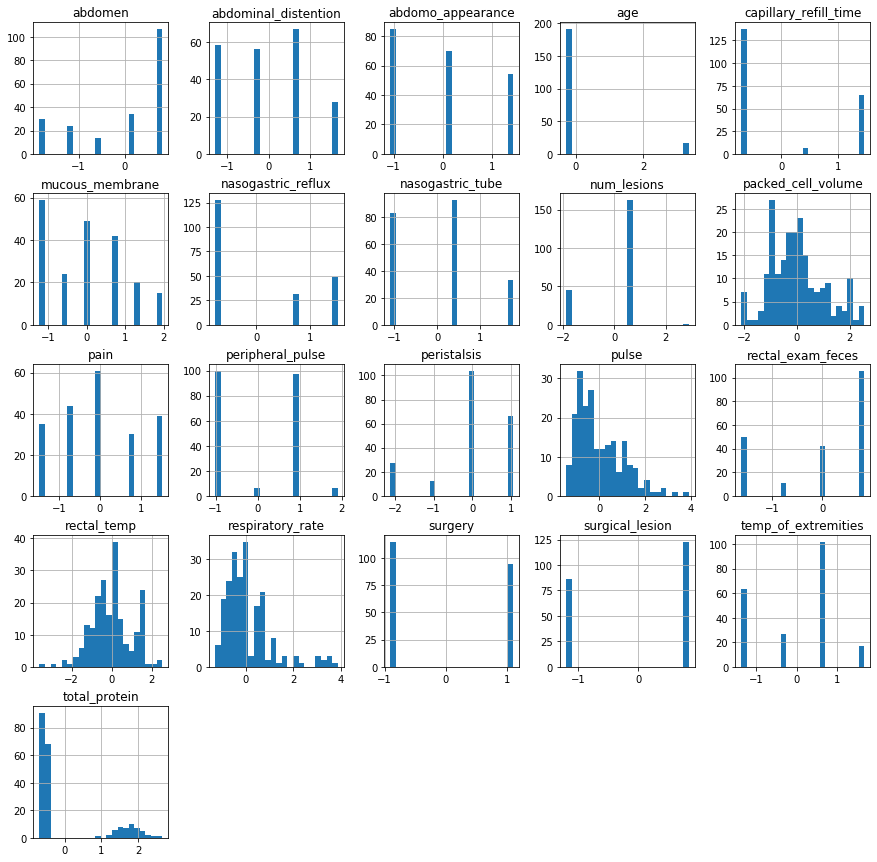

In [59]:
dfTrain.hist(bins=22, figsize=(15, 15))

In [28]:
y_train = target
x_train = dfTrain
x_test = dfTest

**Logistic Regression**

In [29]:
lr = LogisticRegression(random_state=0)
param_grid={"C":np.logspace(-3,3,10)}
grid = GridSearchCV(lr, param_grid, cv=5, verbose=0)
grid_search=grid.fit(x_train, y_train)
print('The best value found for the hyperparameter C is ' + str(grid_search.best_params_['C']))
print('The best result on the training set using 5-Fold CV was ' + str(grid_search.best_score_))
y_pred = grid_search.predict(x_test)
print('The best result predicting the test set was ' + str(accuracy_score(y_test, y_pred)))
confusion_matrix(y_test, y_pred)

The best value found for the hyperparameter C is 0.1
The best result on the training set using 5-Fold CV was 0.7031358885017422
The best result predicting the test set was 0.6444444444444445


array([[43,  5,  2],
       [ 9, 11,  2],
       [ 9,  5,  4]], dtype=int64)

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)

In [31]:
fpr

array([0.        , 0.08823529, 0.23529412, 1.        ])

In [32]:
tpr

array([0.        , 0.09090909, 0.59090909, 1.        ])

In [33]:
thresholds

array([4., 3., 2., 1.])